# Подготовительный раздел - загрузка, уточнённые форматы данных.
## Ссылки на руководства:
 * [Годное руководство по Pandas](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb)
 * [Сборник руководств pandas](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)

In [19]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
# import numpy as np
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

plt.rcParams['figure.figsize'] = (15, 5)

# Enable inline plotting
%matplotlib inline

In [20]:
print('Python version :' + sys.version)
print('Pandas version :' + pd.__version__)
print('Matplotlib version :' + matplotlib.__version__)
# print('NumPy version :' + numpy.__version__)

Python version :3.7.0 (default, Jun 29 2018, 20:13:13) 
[Clang 9.1.0 (clang-902.0.39.2)]
Pandas version :0.23.4
Matplotlib version :2.2.3


In [21]:
Location = r'data/DmSolunsky-homeless-2017.csv'
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv(Location)
df["Дата"] = pd.to_datetime(df["Дата"])
# df['Дата'] = df['Дата'].dt.strftime('%m/%d/%Y')

In [22]:
# df['Дата'] = df['Дата'].dt.str
df.index = df['Дата']
df.groupby(pd.Grouper(freq='W')).mean()[1:5]

,Лесная,Просвящения,Купчино,Автобус,Автобус ночёвки
Дата,,,,,
2017-01-08,16.50,12.75,7.00,21.67,nan
2017-01-15,21.80,12.80,5.50,35.33,nan
2017-01-22,20.00,14.00,4.50,40.00,nan
2017-01-29,16.40,17.00,6.00,37.00,nan


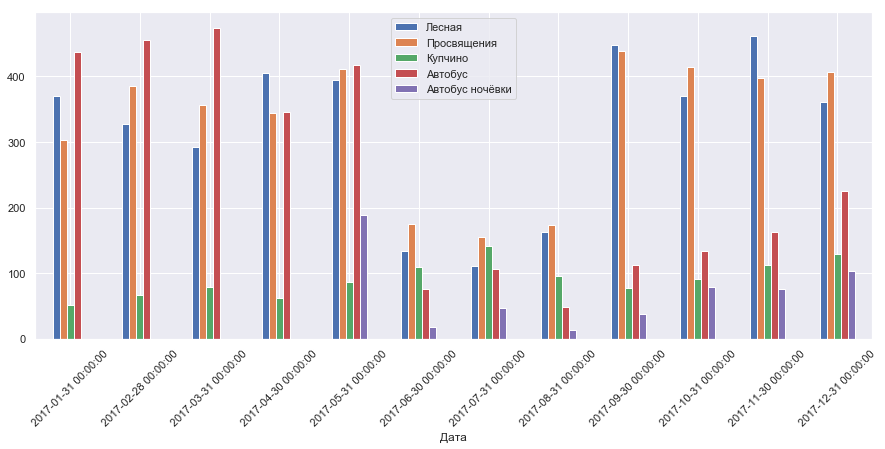

In [23]:
monthTotalDF = df.groupby(pd.Grouper(freq='M')).sum()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 15 and height to 6
fig_size = (15, 6)
plt.rcParams["figure.figsize"] = fig_size
# Draw
monthTotalDF.plot(kind ='bar', rot = 45)

In [24]:
monthCountDF = df.groupby(pd.Grouper(freq='M')).count()
monthCountDF[1:7]

,Дата,Лесная,Просвящения,Купчино,Автобус,Автобус ночёвки
Дата,,,,,,
2017-02-28,28,20,20,12,12,0
2017-03-31,31,23,23,16,13,0
2017-04-30,30,20,20,13,12,0
2017-05-31,31,23,23,16,13,12
2017-06-30,30,9,9,17,4,4
2017-07-31,31,8,8,18,5,5


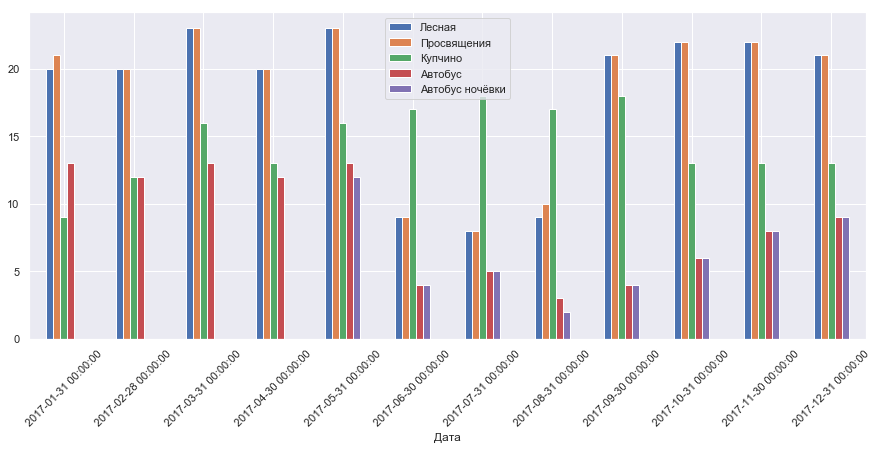

In [25]:
monthCountDF[['Лесная','Просвящения', 'Купчино', 'Автобус', 'Автобус ночёвки']].plot(kind='bar', rot = 45)

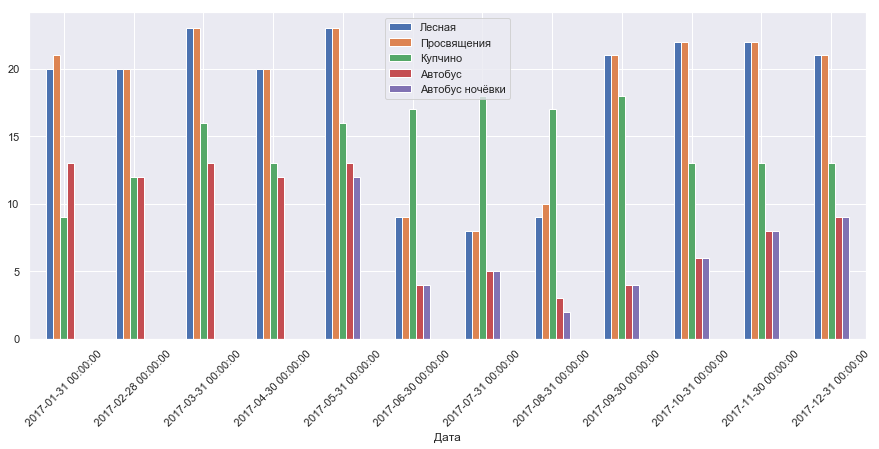

In [26]:
import seaborn as sns
sns.set()
monthCountDF[['Лесная','Просвящения', 'Купчино', 'Автобус', 'Автобус ночёвки']].plot(kind='bar', rot = 45)

In [27]:
monthAverageDF = df.groupby(pd.Grouper(freq='M')).mean()
monthAverageDF

,Лесная,Просвящения,Купчино,Автобус,Автобус ночёвки
Дата,,,,,
2017-01-31,18.55,14.43,5.67,33.62,nan
2017-02-28,16.35,19.30,5.58,37.92,nan
2017-03-31,12.70,15.52,4.94,36.46,nan
2017-04-30,20.30,17.20,4.77,28.83,nan
2017-05-31,17.17,17.87,5.38,32.08,15.75
2017-06-30,14.89,19.44,6.47,19.00,4.25
2017-07-31,13.88,19.38,7.83,21.40,9.20
2017-08-31,18.00,17.40,5.65,16.00,6.50
2017-09-30,21.33,20.90,4.33,28.25,9.25


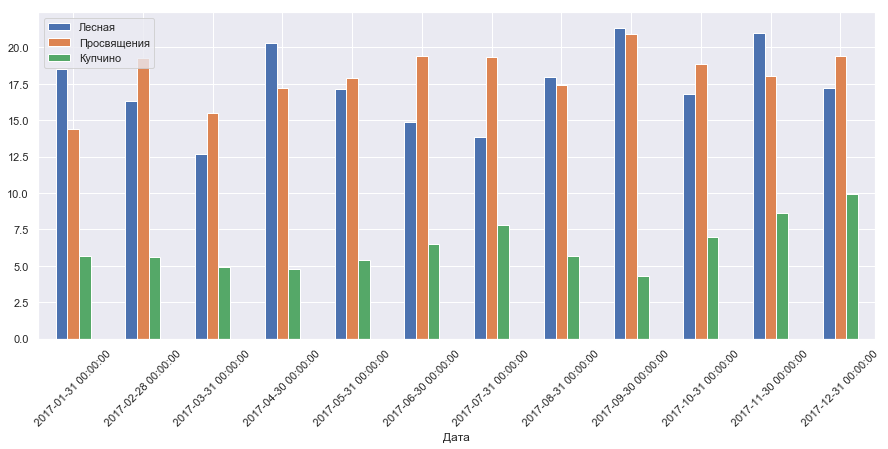

In [28]:
monthAverageDF[['Лесная','Просвящения', 'Купчино']].plot(kind='bar', rot=45)

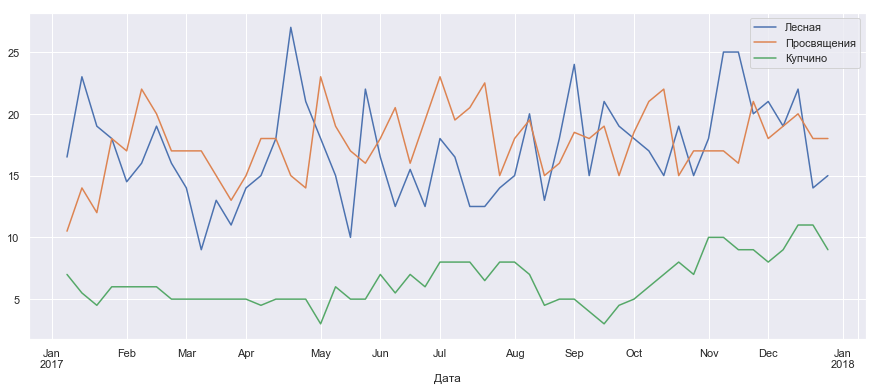

In [29]:
weeklyAverageDF = df.groupby(pd.Grouper(freq='W')).median()
weeklyAverageDF[['Лесная','Просвящения', 'Купчино']].plot()